<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202401/blob/main/Modulo07/Modulo07_PCA_Text_as_Data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Ejemplos Principal Component Analysis

## Test Scores

In [6]:
require("pacman")
p_load("tidyverse")

Loading required package: pacman



In [ ]:
dta<-read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/estudiantes.csv")
dta

In [ ]:
rownames(dta)<-dta$Estudiante
dta<-dta[,-1]
dta

In [ ]:
res_pca <- prcomp(dta)
res_pca

In [ ]:
p_load("factoextra")
eig_val <- get_eigenvalue(res_pca)
eig_val

also installing the dependencies ‘estimability’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘multcompView’, ‘scatterplot3d’, ‘dendextend’, ‘FactoMineR’




In [ ]:
fviz_eig(res_pca, addlabels = TRUE, ylim = c(0, 70))

In [ ]:
ggplot(eig_val,aes(x=1:5,y=cumulative.variance.percent)) +
    geom_point()+
    geom_line() +
    theme_bw()

In [ ]:
fviz_pca_biplot(res_pca, 
                repel = TRUE,# Avoid text overlapping
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

##  Votos en el congreso de Estados Unidos

Este es un ejemplo un poco mas complejo de como votan los miembros del Congreso de Estados IUnidos. 

Tenemso información de los votos del 111vo Congreso que cubre los años 2009 y 2010, que son los dos primeros años de la presidencia de Obama.

Hay 445 miembors que votan en la casa de representantes (US House of Representatives) y se registraron 1647 vots con -1 por el negativo, +1 por positivo, y 0 por la abstencion o la ausencia

In [ ]:
votes <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/rollcall-votes.csv")
head(votes)

In [ ]:
dim(votes)

In [ ]:
legis <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/rollcall-members.csv")
head(legis)

En este contexto podriamos pensar para una estructura factorial subjacente de baja dimensión. Aunque cada uno de los votos se refiere a temas diferentes, los representantes suelen están alineados según ejes partidistas e ideológicos (por ejemplo, republicano versus demócrata o liberal versus conservador). Si creemos que todos los votos son partidistas, entonces el voto por el miembro i en el tema j podría predecirse como

$$
x_{i} = h f_i
$$

donde f es el posicionamiento ideologico latente y h como este posicionamiento afecta los votos. Este tipo de situaciones es ideal para PCA

In [ ]:
#Estimamos PCA
pcavote <- prcomp(votes, scale=TRUE)

pcavote$rotation

In [ ]:
fviz_eig(pcavote, addlabels = TRUE, ylim = c(0, 40))

In [ ]:
fviz_pca_biplot(pcavote)

In [ ]:
fviz_pca_biplot(pcavote, 
                col.ind = legis$party,
                palette = c("blue", "green", "red"),
                invisible ="var",
                repel=TRUE,
                labelsize = 2
                )

In [ ]:
votepc <- predict(pcavote) #
votepc[order(votepc[,1])[1:5],1]

In [ ]:
votepc[order(-votepc[,1])[1:5],1]

In [ ]:
votepc[order(votepc[,2])[1:5],2]

In [ ]:
votepc[order(-votepc[,2])[1:5],2]

In [ ]:
loadings <- pcavote$rotation[,1:2]

In [ ]:
hist(loadings[,1], main="", xlab="1st Principle Component Vote-Loadings",
     col=8, border=grey(.9))
abline(v=loadings[884,1], col=2)
text(x=loadings[884,1], y=550, "Afford. Health (amdt.)", xpd=TRUE, col=2, font=3)
abline(v=loadings[25,1], col=4)
text(x=loadings[25,1], y=550, "TARP", xpd=TRUE, col=4, font=3)

In [ ]:
loadings[order(abs(loadings[,2]), decreasing=TRUE)[1:5],2]

In [ ]:
sort(rowSums(votes==0), decreasing=TRUE)[1:5]

# Principal Component Regression

Para ilustrar vamos a usar datos de television que incluyen respuestas a encuestas para grupos focales sobre programas piloto de televisión (primeros episodios de una nueva serie), así como los resultados del primer año de calificaciones (cuántas personas terminaron viendo el programa). La esperanza es que podamos crear una regla para predecir el interés de los espectadores a partir de encuestas piloto, ayudando así a los estudios a tomar mejores decisiones de programación. 



In [1]:
shows <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/nbc_showdetails.csv", row.names=1)
shows$Genre <- factor(shows$Genre)
head(shows)

,Network,PE,GRP,Genre,Duration
,<chr>,<dbl>,<dbl>,<fct>,<int>
Living with Ed,HGTV,54.0000,151.0,Reality,30
Monarch Cove,LIFE,64.6479,375.5,Drama/Adventure,60
Top Chef,BRAVO,78.5980,808.5,Reality,60
Iron Chef America,FOOD,62.5703,17.3,Reality,30
Trading Spaces: All Stars,TLC,56.0000,44.1,Reality,60
Lisa Williams: Life Among the Dead,LIFE,56.2056,382.6,Reality,60


Tenemos un par de variables de resultado interesantes . Las medidas clásicas de la comerciabilidad de la radiodifusión son las calificaciones. Específicamente, los puntos de rating bruto (GRP) proporcionan un recuento estimado de la audiencia total. En estos datos también realizamos un seguimiento del compromiso proyectado (PE) como una medida más sutil de la atención de la audiencia. Después de ver un programa, se contacta a los espectadores y se les pregunta sobre el orden y los detalles de los eventos del programa. Esto mide su compromiso con el programa (y, quizás lo más importante, con los anuncios mostrados). La PE se informa en una escala de 0 a 100, donde 100 significa que estaban completamente comprometidos y 0 significa que no prestaron atención en absoluto.



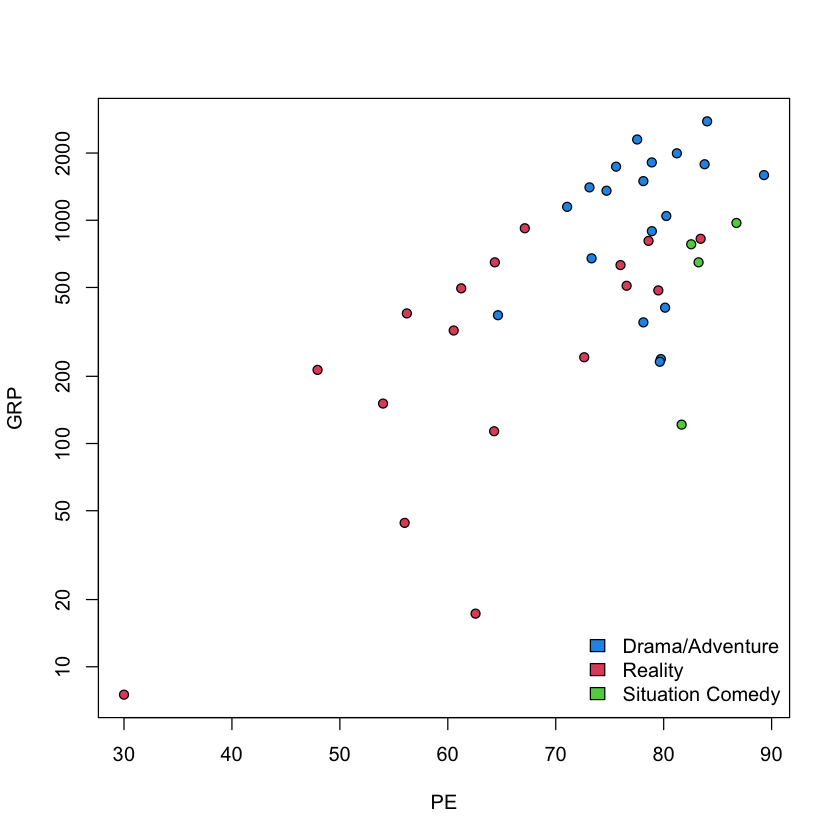

In [2]:
plot(GRP ~ PE, data=shows, bg=c(4,2,3)[shows$Genre], pch=21, log="y")
legend("bottomright", legend=levels(shows$Genre), fill=c(4,2,3), bty="n")

Los datos de la encuesta incluyen 6241 vistas y 20 preguntas para 40 programas. Hay dos tipos de preguntas en la encuesta. Ambos  preguntan hasta qué punto estás de acuerdo con una afirmación. Para el primer trimestre, esta afirmación toma la forma de "Este programa me hace sentir...". Para el segundo trimestre, la afirmación es "Encuentro que este programa me hace sentir...". 



In [3]:
survey <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/nbc_pilotsurvey.csv", as.is=TRUE) 
survey$Show <- factor(survey$Show, levels=rownames(shows))
head(survey)

,Viewer,Show,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,⋯,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,71,Iron Chef America,3,4,4,3,5,4,3,2,⋯,2,2,4,3,1,3,5,2,2,4
2,71,Trading Spaces: All Stars,4,4,3,4,5,2,3,3,⋯,3,1,3,4,2,4,4,2,3,4
3,71,House Hunters,4,4,4,5,5,3,3,2,⋯,4,2,3,5,4,5,2,1,4,4
4,71,What Not to Wear,4,3,3,3,4,2,2,4,⋯,3,2,5,4,4,3,3,2,3,4
5,71,America's Next Top Model,4,4,3,4,4,4,3,3,⋯,2,1,3,4,2,3,3,2,3,3
6,73,Next,2,4,2,4,2,3,3,3,⋯,4,1,4,5,3,2,1,3,5,2


In [4]:
Xpilot <- aggregate(survey[,-(1:2)],  ## -(1:2) to remove the variables 'show' and 'viewer' completely
                by=list(Show=survey$Show), mean)


rownames(Xpilot) <- Xpilot[,1]
Xpilot <- Xpilot[,-1]
head(Xpilot)

,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,Q1_Indifferent,Q2_Relatable,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Living with Ed,3.890244,3.780488,3.926829,3.865854,3.804878,3.609756,3.573171,2.609756,3.121951,3.719512,3.926829,2.560976,3.402439,4.134146,3.353659,3.914634,3.878049,2.621951,3.512195,3.500000
Monarch Cove,4.046154,3.861538,3.830769,3.876923,4.000000,3.938462,3.907692,2.969231,3.153846,3.984615,3.784615,2.769231,3.461538,4.107692,3.338462,4.153846,3.876923,2.553846,4.015385,3.707692
Top Chef,3.845745,3.595745,3.632979,3.771277,3.856383,3.196809,3.000000,2.191489,2.398936,3.218085,3.569149,1.840426,2.851064,4.297872,2.489362,3.845745,3.547872,1.829787,3.606383,3.180851
Iron Chef America,3.910053,3.693122,3.613757,3.851852,3.936508,3.333333,3.047619,2.116402,2.439153,3.132275,3.539683,1.947090,2.878307,4.227513,2.513228,3.777778,3.687831,1.915344,3.560847,3.269841
Trading Spaces: All Stars,3.807487,3.540107,3.513369,3.780749,3.909091,3.294118,2.802139,2.101604,2.427807,3.229947,3.481283,1.871658,2.754011,4.149733,2.304813,3.839572,3.780749,1.855615,3.310160,3.016043
Lisa Williams: Life Among the Dead,3.716216,3.648649,3.554054,3.662162,3.756757,3.567568,3.378378,2.202703,2.581081,3.472973,3.378378,2.216216,2.770270,4.000000,3.013514,3.878378,3.797297,1.905405,3.756757,3.527027


In [5]:
PCApilot <- prcomp(Xpilot, scale=TRUE)

fviz_eig(PCApilot, addlabels = TRUE, ylim = c(0, 45))

ERROR: Error in fviz_eig(PCApilot, addlabels = TRUE, ylim = c(0, 45)): could not find function "fviz_eig"


In [ ]:
round(PCApilot$rotation[,1:3],1)

In [ ]:
fviz_pca_biplot(PCApilot, 
                col.ind = shows$Genre,
                palette = c("blue", "green", "red"),
                ylim=c(-3,3),
                xlim=c(-6,6), # hides "monarch cove",living with ed", and "next" but these are all tiny 
                invisible ="var",
                repel=TRUE,
                labelsize = 2
                )

In [ ]:
p_load("gamlr")

In [ ]:
zpilot <- predict(PCApilot)

PE <- shows$PE
zdf <- as.data.frame(zpilot)

summary(PEglm <- glm(PE ~ ., data=zdf[,1:2]))

In [ ]:
cvlasso <- cv.gamlr(x=as.matrix(Xpilot), y=PE, nfold=10)
coef(cvlasso) 

In [ ]:
cvlassoPCR <- cv.gamlr(x=zpilot, y=PE, nfold=10) 
coef(cvlassoPCR) 

In [ ]:
cvlassoboth <- cv.gamlr(x=as.matrix(cbind(Xpilot,zpilot)), y=PE, nfold=10)
coef(cvlassoboth)

In [ ]:
par(mfrow=c(1,3), mai=c(.2,.2,.5,.1), omi=c(.5,.5,0,0))
plot(cvlasso, main="Lasso on X", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
plot(cvlassoPCR, main="Lasso on PCR", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
plot(cvlassoboth, main="Lasso on X and PCR", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
mtext(side=2, "mean squared error", outer=TRUE, line=2)
mtext(side=1, "log lamba", outer=TRUE, line=2)

# Texto como Datos: Ejemplos

## Regresión con Texto: Gentzkow and Shapiro

<div >
<img src = "figures/gentzgow_shapiro.png" />
</div>

In [ ]:
require("pacman")
p_load("tidyverse","textir")

In [ ]:
data("congress109", package = "textir")

In [ ]:
congress109Counts[c("Barack Obama","John Boehner"),995:998]

In [ ]:
congress109Ideology[c("Barack Obama","John Boehner"),1:5]

### Regresión 

$$
RepShare= X\beta  + u
$$

In [ ]:
dim(congress109Counts)

In [ ]:
X <- as(congress109Counts, "dMatrix")
repshare <- congress109Ideology$repshare

In [ ]:

X1 <- as.matrix(congress109Counts)
words<-colnames(X1)

covariance<-apply(X1,2,function(x) cor(x,repshare))

                  

wordcloud(words = words,
          freq = covariance,
          min.freq = 0,
          scale = c(1.5, 0.1), 
          max.words=200, 
          random.order=FALSE, 
          colors=brewer.pal(8, "YlOrRd"))


In [ ]:
# lasso
lassoslant <- cv.gamlr(X>0, repshare)  

B <- coef(lassoslant$gamlr)[-1,] 

In [ ]:
tail(sort(round(B[B!=0],4)),10)

In [ ]:
head(sort(round(B[B!=0],4)),10)

## Modelado de temas subyacentes


In [ ]:
data("we8there", package = "textir")

Waffle House #1258 in Bossier City, Louisiana:

*I normally would not revue a Waffle House but this one deserves it. The workers, Amanda, Amy, Cherry, James and J.D. were the most pleasant crew I have seen. While it was only lunch, B.L.T. and chili, it was great. The best thing was the 50’s rock and roll music, not to loud not to soft. This is a rare exception to what you all think a Waffle House is. Keep up the good work.*

*Overall: 5, Atmosphere: 5, Food: 5, Service: 5, Value: 5.*



Sartin’s Seafood in Nassau Bay, Texas,

*Had a very rude waitress and the manager wasn’t nice either.*
*Overall: 1, Atmosphere: 1, Food: 1, Service: 1, Value: 5.*

In [ ]:
x <- we8thereCounts
x[1,x[1,]!=0]

### PCA

In [ ]:
pca <- prcomp(x, scale=TRUE) # cuidado demora mucho

In [ ]:
tail(sort(pca$rotation[,1]))

In [ ]:
tail(sort(pca$rotation[,4]))

In [ ]:
v <- predict(pca)[,1:4]

In [ ]:
boxplot(v[,1] ~ we8thereRatings$Overall, xlab="overall rating", ylab="PC1 score")

### LDA

In [ ]:
p_load("maptpx") # para modelar topicos

x <- as.simple_triplet_matrix(we8thereCounts)

In [ ]:
tpc <- topics(x,K=10) 

In [ ]:
tpcs <- topics(x,K=5*(1:5), verb=1)

In [ ]:
summary(tpcs, n=10) 

In [ ]:
rownames(tpcs$theta)[order(tpcs$theta[,1], decreasing=TRUE)[1:10]]


In [ ]:
rownames(tpcs$theta)[order(tpcs$theta[,2], decreasing=TRUE)[1:10]]

In [ ]:
boxplot(tpcs$omega[,1] ~ we8thereRatings$Overall, col="gold", xlab="overall rating", ylab="topic 1 score")


In [ ]:
boxplot(tpcs$omega[,2] ~ we8thereRatings$Overall, col="pink", xlab="overall rating", ylab="topic 2 score")

In [ ]:
stars <- we8thereRatings[,"Overall"]

In [ ]:
Xtopics<-as(tpcs$omega, "dMatrix")

In [ ]:
p_load("gamlr")
regtopics.cv <- cv.gamlr(tpcs$omega, stars)

In [ ]:
regwords.cv <- cv.gamlr(we8thereCounts, stars)

In [ ]:
par(mfrow=c(1,2), mai=c(.3,.6,.7,.1), omi=c(.5,.2,0,0))
plot(regtopics.cv, ylim=c(1,2), xlab="", ylab="")
mtext("topic regression", font=2, line=2)
plot(regwords.cv, ylim=c(1,2), xlab="", ylab="")
mtext("token regression", font=2, line=2)
mtext(side=2, "mean squared error", outer=TRUE, line=0)
mtext(side=1, "log lamba", outer=TRUE, line=1)